# Task-2 : Use Clustering Techniques for the any customer dataset using machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop(columns='CustomerID', inplace=True)

In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [13]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

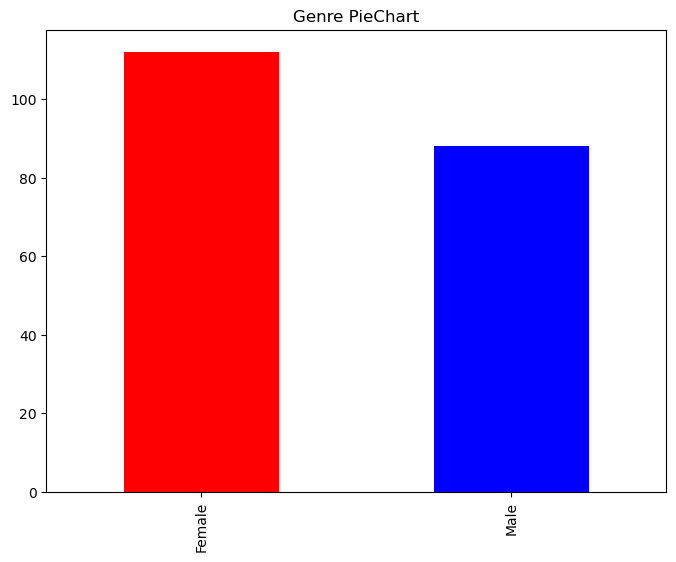

In [14]:
df.Genre.value_counts().plot(kind='bar', title="Genre PieChart", figsize=(8,6), color=["red", "blue"])
plt.show()

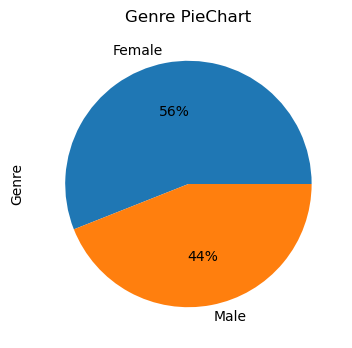

In [16]:
df.Genre.value_counts().plot(kind='pie', autopct='%1.0f%%', title="Genre PieChart", figsize=(6,4))
plt.show()

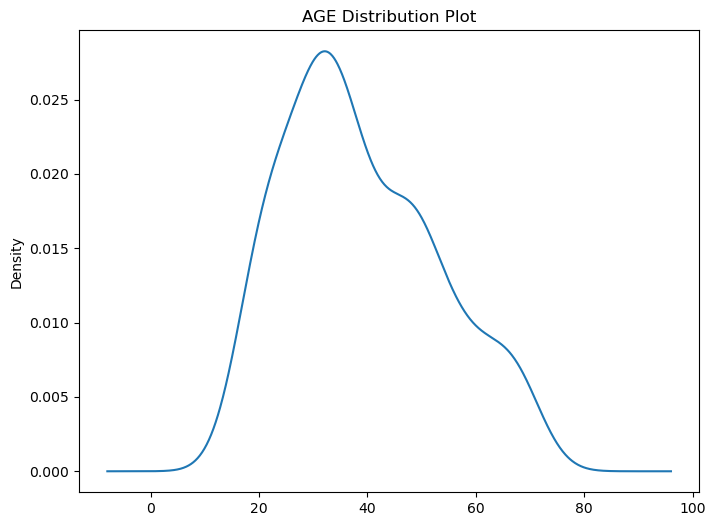

In [17]:
df.Age.plot(kind='kde',figsize=(8,6), title="AGE Distribution Plot")
plt.show()

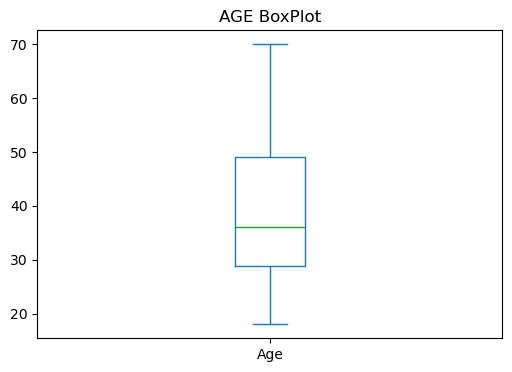

In [18]:
df.Age.plot(kind='box',figsize=(6,4), title="AGE BoxPlot")
plt.show()

In [19]:
df['Annual Income (k$)'].max()

137

In [20]:
df['Annual Income (k$)'].min()

15

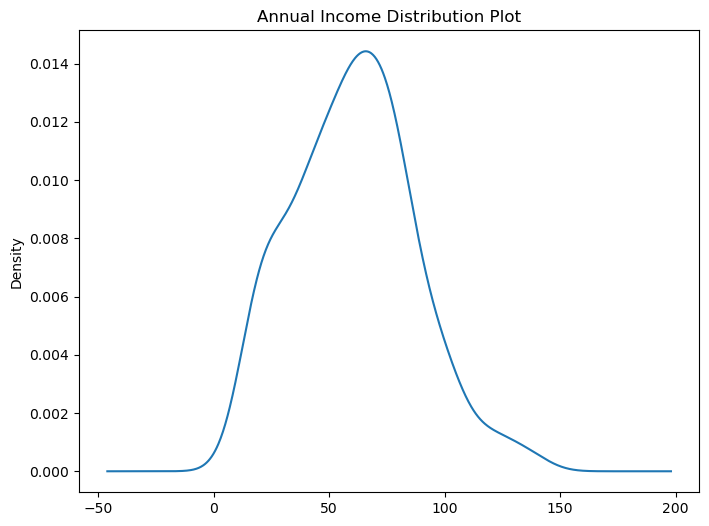

In [21]:
df['Annual Income (k$)'].plot(kind='kde', figsize=(8,6), title="Annual Income Distribution Plot")
plt.show()

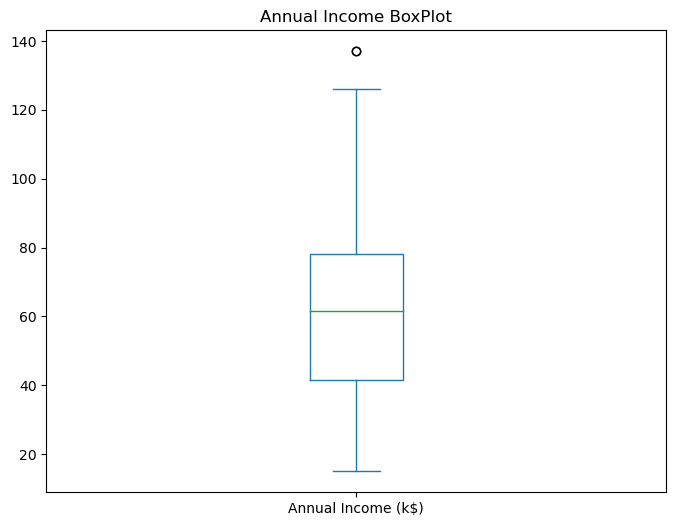

In [22]:
df['Annual Income (k$)'].plot(kind='box', figsize=(8,6), title="Annual Income BoxPlot")
plt.show()

In [23]:
df = df[df['Annual Income (k$)']<120]

In [24]:
df.shape

(194, 4)

In [25]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


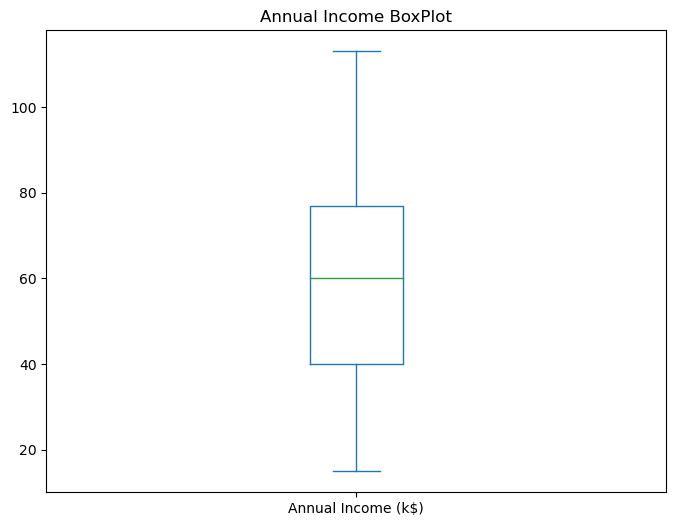

In [26]:
df['Annual Income (k$)'].plot(kind='box', figsize=(8,6), title="Annual Income BoxPlot")
plt.show()

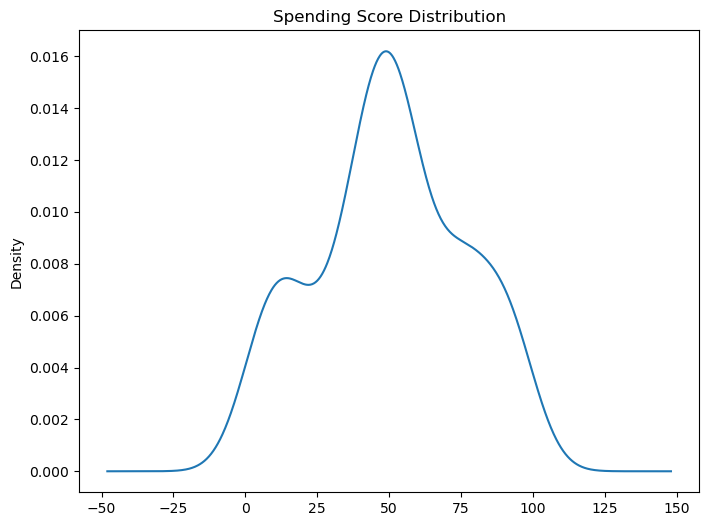

In [27]:
df['Spending Score (1-100)'].plot(kind='kde', figsize=(8,6), title="Spending Score Distribution")
plt.show()

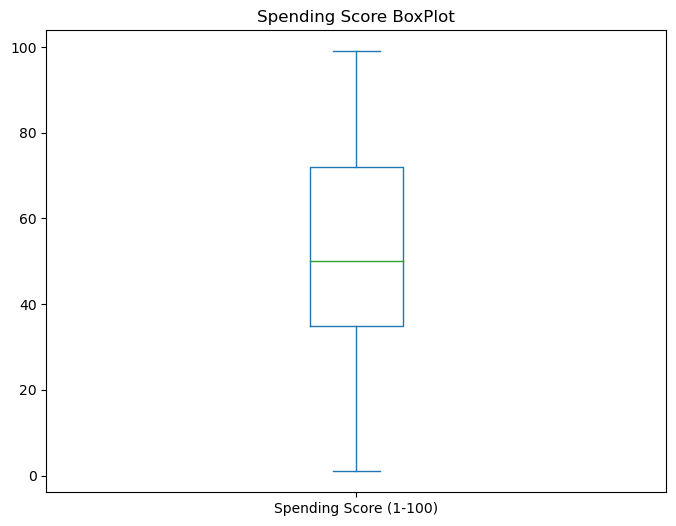

In [28]:
df['Spending Score (1-100)'].plot(kind='box', figsize=(8,6), title="Spending Score BoxPlot")
plt.show()

In [29]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [30]:
df['Genre'] = df['Genre'].apply(lambda x: 1 if 'Male' in x else 0)

In [31]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [32]:
from sklearn.cluster import KMeans

In [33]:
X = df.iloc[:,:].values
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

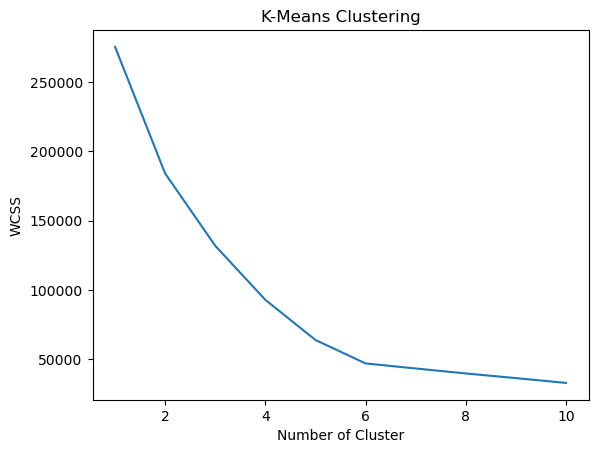

In [34]:
wcss = [] # empty list
for index in range(1,11): # range 1 to 10 implies that between this range any no. of clusters can be formed
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("K-Means Clustering")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=42)

In [40]:
cluster_values = kmeans.fit_predict(X)

In [41]:
print(cluster_values)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0]


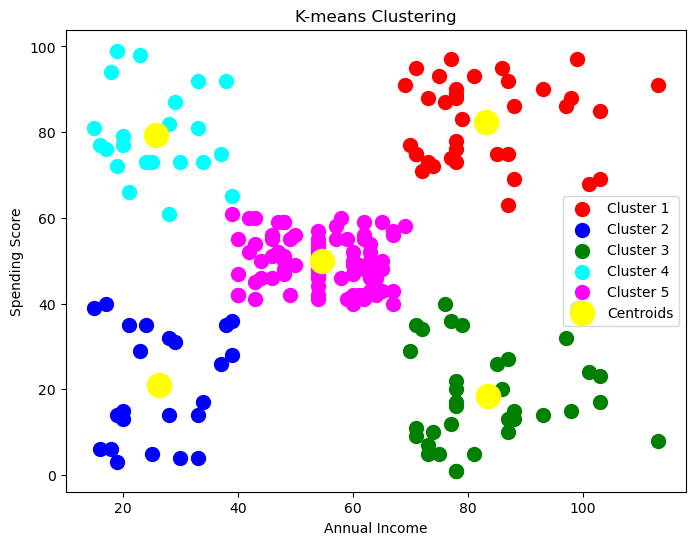

In [42]:
# Scatter plot for K-means Clustering

plt.figure(figsize=(8,6))

plt.scatter(X[cluster_values == 0, 2], X[cluster_values == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster_values == 1, 2], X[cluster_values == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster_values == 2, 2], X[cluster_values == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[cluster_values == 3, 2], X[cluster_values == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[cluster_values == 4, 2], X[cluster_values == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')

# Centroids for Clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')

# Graph Labels
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [43]:
cluster_values.shape

(194,)

In [44]:
df['Target'] = cluster_values

In [45]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,19,15,39,1
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1


In [46]:
df.Target.value_counts()

4    78
0    36
2    35
1    23
3    22
Name: Target, dtype: int64

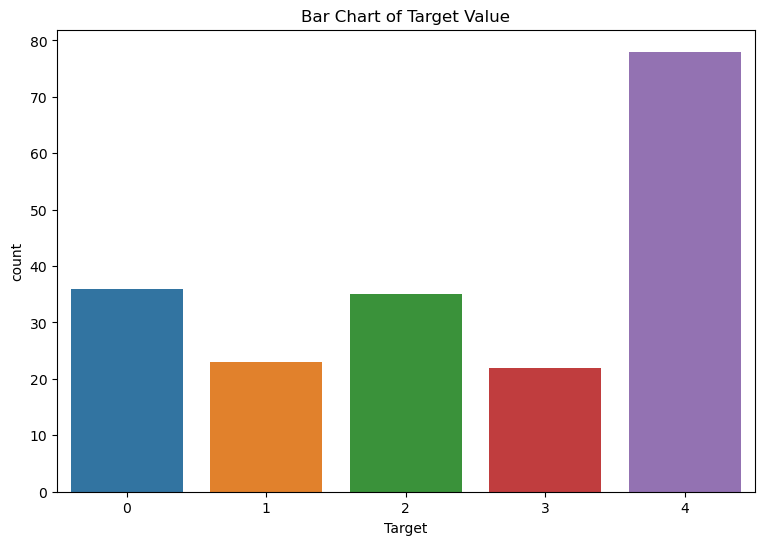

In [47]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.Target)
plt.title("Bar Chart of Target Value")
plt.show()

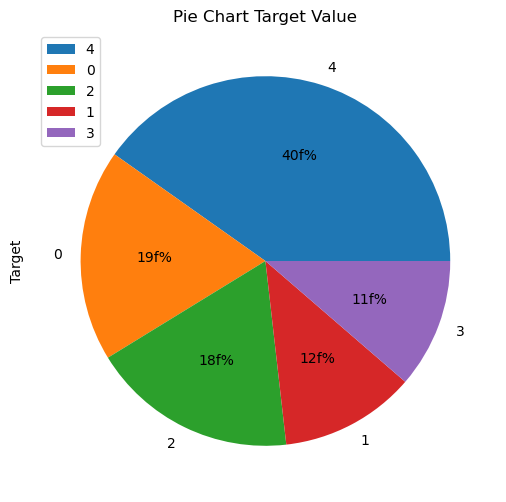

In [48]:
df.Target.value_counts().plot(kind='pie', autopct="%1.0ff%%",figsize=(9,6), title="Pie Chart Target Value", legend=True)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [51]:
# Split the data into features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [52]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
189,0,36,103,85
190,0,34,103,23
191,0,32,103,69
192,1,33,113,8


In [53]:
y

0      1
1      3
2      1
3      3
4      1
      ..
189    0
190    2
191    0
192    2
193    0
Name: Target, Length: 194, dtype: int32

In [54]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [55]:
# from sklearn.preprocessing import StandardScaler

# # Create StandardScaler object and apply fit_transform on training data

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.values)

# # Apply transform on testing data using the already trained scaler

# X_test = scaler.transform(X_test)

In [56]:
# Train and test a decision tree classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cr_dtc = classification_report(y_test, y_pred_dtc)

In [57]:
# Train and test a k-nearest neighbors classifier

knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)

In [58]:
# Train and test a Gaussian Naive Bayes classifier

gnb = GaussianNB()
gnb.fit(X_train.values, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cr_gnb = classification_report(y_test, y_pred_gnb)

In [59]:
# Train and test a random forest classifier

rf = RandomForestClassifier()
rf.fit(X_train.values, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

In [60]:
# Train and test a support vector machine classifier

svc = SVC()
svc.fit(X_train.values, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cr_svc = classification_report(y_test, y_pred_svc)

In [63]:
# Print the accuracies of each classifier

print("Decision Tree Accuracy:", accuracy_dtc)
print("KNN Accuracy:", accuracy_knn)
print("Gaussian NB Accuracy:", accuracy_gnb)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svc)

Decision Tree Accuracy: 1.0
KNN Accuracy: 0.9743589743589743
Gaussian NB Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 0.9743589743589743


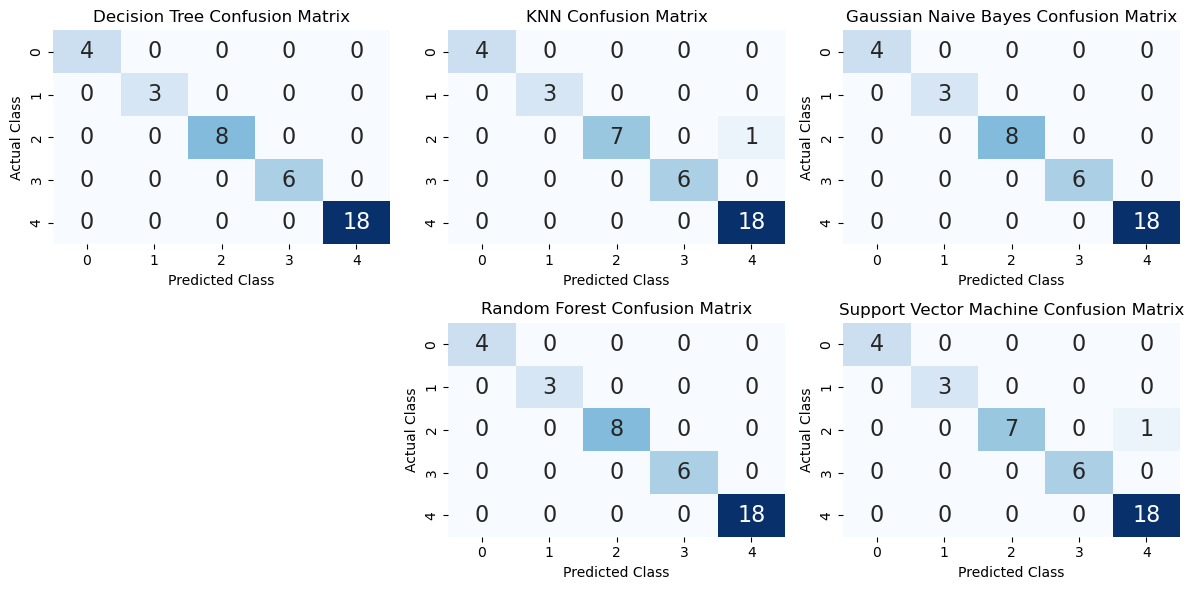

In [65]:
# Plot the confusion matrices for each classifier

plt.figure(figsize=(12, 6))
plt.subplot(231)
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(232)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Class")

plt.subplot(2, 3, 3)
sns.heatmap(cm_gnb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")


plt.subplot(2, 3, 5)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(2, 3, 6)
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.tight_layout()
plt.show()

### Print the classification reports for each classifier

In [67]:
print("Decision Tree Classifier:\n", cr_dtc)
print("KNN Classifier:\n", cr_knn)
print("Gaussian Naive Bayes Classifier:\n", cr_gnb)
print("Random Forest Classifier:\n", cr_rf)
print("Support Vector Machine Classifier:\n", cr_svc)

Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

KNN Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         6
           4       0.95      1.00      0.97        18

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97

In [68]:
import joblib
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

In [69]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,19,15,39,1
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1


In [70]:
df.dtypes

Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Target                    int32
dtype: object

In [71]:
df.to_csv("clean.csv")

In [72]:
df['Spending Score (1-100)'].max()

99